# The z-Distribution <hr style="border:2.px solid #Ff0cb"></hr>

Data Analyst: Charles Ian Gabriel M. Guevarra <br>
Department: Electrical Engineering

In [1]:
# import and packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [15]:
# load dataset
df = pd.read_csv(r"transformer-voltage.csv",delimiter=',')
df

,Sample,Voltage
0,1,119.8
1,2,120.3
2,3,154.0
3,4,119.5
4,5,120.2
5,6,119.9
6,7,120.4
7,8,119.6
8,9,120.1
9,10,119.7


In [16]:
# summary of 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   30 non-null     int64  
 1   Voltage  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [17]:
# summary statistics
df.describe()


,Sample,Voltage
count,30.000000,30.000000
mean,15.500000,120.000000
std,8.803408,9.978425
min,1.000000,93.300000
25%,8.250000,119.700000
50%,15.500000,119.950000
75%,22.750000,120.200000
max,30.000000,154.000000


In [18]:
# z-critical for two-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
z_critical

np.float64(1.959963984540054)

In [19]:
# confidence interval 
pop_std = 0.5 

ci_lower, ci_upper = stats.norm.interval(
    confidence = 0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

In [21]:
ci_lower

np.float64(119.82108058562828)

In [22]:
ci_upper

np.float64(120.17891941437172)

In [23]:
print("Confidence interval = ", ci_lower.round(2),",",ci_upper.round(2))

Confidence interval =  119.82 , 120.18


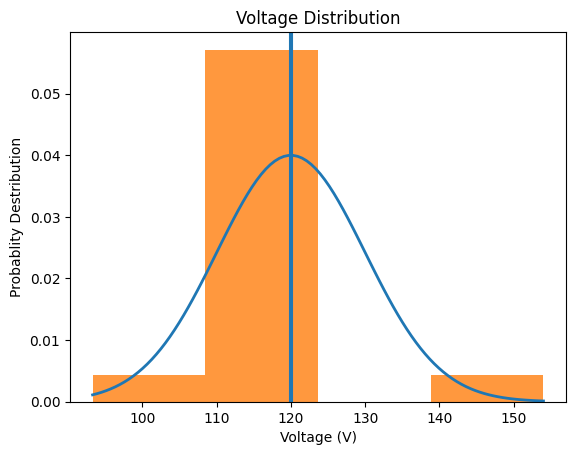

In [30]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis 
x_min = df['Voltage'].min() 
x_max = df['Voltage'].max()

# normal distribution plot
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, linewidth=2)

# histogram
plt.hist(df['Voltage'], bins=4, density=True, alpha=0.8)
plt.title('Voltage Distribution')
plt.ylabel('Probablity Destribution')
plt.xlabel('Voltage (V)')

# confidence interval 
plt.axvline(x=ci_lower)
plt.axvline(x=ci_upper)
plt.show()